In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import mlrose
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter as pc
import itertools
import pandas as pd
import copy
from sklearn.externals import joblib

from utilities_hw2 import plot_results

# Knapsack

In [3]:
results = {}

In [4]:
iters = 5 # number of iterations for each setting in grid search

# results = {}    

np.random.seed(2)

maxWeight = 0.65

# Initialize backpack parameters here so all algo's use the same problems
n_items = [10, 20, 30, 40, 50, 75, 100]
weights = {}
values = {}
for n_item in n_items:
    weights[n_item] = np.random.rand(n_item)
    values[n_item] = np.random.rand(n_item)

problem = mlrose.DiscreteOpt

algorithms = {
#     'MIMIC': {
#         'algorithm': mlrose.mimic,
#         'param_grid_algorithm': {'return_statistics': True, 'pop_size': ['2*problem_length'], 'keep_pct': [0.2], 'max_attempts': [15], 'max_iters': 1000},
#     },
#     'Hill Climbing': {
#         'algorithm': mlrose.hill_climb,
#         'param_grid_algorithm': {'return_statistics': True, 'restarts': 5},
#     },
#     'Hill Climbing (sample)': {
#         'algorithm': mlrose.random_hill_climb,
#         'param_grid_algorithm': {'return_statistics': True, 'restarts': 5, 'max_attempts': 20},
#     },
#     'Simulated Annealing': {
#         'algorithm': mlrose.simulated_annealing,
#         'param_grid_algorithm': {'return_statistics': True, 'max_attempts': 100},
#     },
    'Genetic Algorithm - Unordered': {
        'algorithm': mlrose.genetic_alg,
        'param_grid_algorithm': {'return_statistics': True, 'elite': 0.3, 'pop_size': ['5*problem_length'], 'mutation_prob': 0.1, 'max_attempts': 10},
    },
}

# for k, d in algorithms.items():
#     d['problem'] = problem
#     d['param_grid_problem'] = param_grid_problem

for algo_name, settings in algorithms.items():
    results[algo_name] = []
    for n_item in n_items:
        fitness_fn = mlrose.Knapsack(weights[n_item], values[n_item], maxWeight)

        param_grid_problem = {'fitness_fn': fitness_fn,
                              'max_val': 2,
                              'length': n_item, 
                             }
        thisSettings = copy.deepcopy(settings.copy())
        thisSettings['problem'] = problem
        thisSettings['param_grid_problem'] = param_grid_problem
    
        print(f"Looping for {algo_name}, n_item={n_item}")
        gs = mlrose.GridSearch(algorithm=thisSettings['algorithm'], param_grid_algorithm=thisSettings['param_grid_algorithm'], 
                               problem=thisSettings['problem'], param_grid_problem=thisSettings['param_grid_problem'], iters=iters)
        gs.evaluate()
        this_df = pd.DataFrame(gs.results)
        results[algo_name].extend(gs.results)

Looping for Genetic Algorithm - Unordered, n_item=10
Running case 1/1: iteration 0
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=12
Running case 1/1: iteration 1
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=17
Running case 1/1: iteration 2
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=12
Running case 1/1: iteration 3
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=16
Running case 1/1: iteration 4
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=17
Looping for Genetic Algorithm - Unordered, n_item=20
Running case 1/1: iteration 0
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=32
Running case 1/1: iteration 1
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=26
Running case 1/1: iteration 2
running with elite = 0.3
Search ended with attempts>max_attempts (

In [5]:
iters = 5 # number of iterations for each setting in grid search

# results = {}    

np.random.seed(2)

maxWeight = 0.65

print("WARNING: Using backpack items ordered by increasing weight")
# Initialize backpack parameters here so all algo's use the same problems
n_items = [10, 20, 30, 40, 50, 75, 100]
weights = {}
values = {}
for n_item in n_items:
    weights[n_item] = np.random.rand(n_item)
    values[n_item] = np.random.rand(n_item)
    order = weights[n_item].argsort()
    weights[n_item] = weights[n_item][order]
    values[n_item] = values[n_item][order]

problem = mlrose.DiscreteOpt

algorithms = {
#     'MIMIC': {
#         'algorithm': mlrose.mimic,
#         'param_grid_algorithm': {'return_statistics': True, 'pop_size': ['2*problem_length'], 'keep_pct': [0.2], 'max_attempts': [15], 'max_iters': 1000},
#     },
#     'Hill Climbing': {
#         'algorithm': mlrose.hill_climb,
#         'param_grid_algorithm': {'return_statistics': True, 'restarts': 5},
#     },
#     'Hill Climbing (sample)': {
#         'algorithm': mlrose.random_hill_climb,
#         'param_grid_algorithm': {'return_statistics': True, 'restarts': 5, 'max_attempts': 20},
#     },
#     'Simulated Annealing': {
#         'algorithm': mlrose.simulated_annealing,
#         'param_grid_algorithm': {'return_statistics': True, 'max_attempts': 100},
#     },
    'Genetic Algorithm - Weight Ordered': {
        'algorithm': mlrose.genetic_alg,
        'param_grid_algorithm': {'return_statistics': True, 'elite': 0.3, 'pop_size': ['5*problem_length'], 'mutation_prob': 0.1, 'max_attempts': 10},
    },
}

# for k, d in algorithms.items():
#     d['problem'] = problem
#     d['param_grid_problem'] = param_grid_problem

for algo_name, settings in algorithms.items():
    results[algo_name] = []
    for n_item in n_items:
        fitness_fn = mlrose.Knapsack(weights[n_item], values[n_item], maxWeight)

        param_grid_problem = {'fitness_fn': fitness_fn,
                              'max_val': 2,
                              'length': n_item, 
                             }
        thisSettings = copy.deepcopy(settings.copy())
        thisSettings['problem'] = problem
        thisSettings['param_grid_problem'] = param_grid_problem
    
        print(f"Looping for {algo_name}, n_item={n_item}")
        gs = mlrose.GridSearch(algorithm=thisSettings['algorithm'], param_grid_algorithm=thisSettings['param_grid_algorithm'], 
                               problem=thisSettings['problem'], param_grid_problem=thisSettings['param_grid_problem'], iters=iters)
        gs.evaluate()
        this_df = pd.DataFrame(gs.results)
        results[algo_name].extend(gs.results)

Looping for Genetic Algorithm - Weight Ordered, n_item=10
Running case 1/1: iteration 0
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=11
Running case 1/1: iteration 1
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=16
Running case 1/1: iteration 2
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=14
Running case 1/1: iteration 3
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=17
Running case 1/1: iteration 4
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=17
Looping for Genetic Algorithm - Weight Ordered, n_item=20
Running case 1/1: iteration 0
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=33
Running case 1/1: iteration 1
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=24
Running case 1/1: iteration 2
running with elite = 0.3
Search ended with attempts>max_

In [6]:
iters = 5 # number of iterations for each setting in grid search

# results = {}    

np.random.seed(2)

maxWeight = 0.65

print("WARNING: Using backpack items ordered by increasing value")
# Initialize backpack parameters here so all algo's use the same problems
n_items = [10, 20, 30, 40, 50, 75, 100]
weights = {}
values = {}
for n_item in n_items:
    weights[n_item] = np.random.rand(n_item)
    values[n_item] = np.random.rand(n_item)
    order = values[n_item].argsort()
    weights[n_item] = weights[n_item][order]
    values[n_item] = values[n_item][order]

problem = mlrose.DiscreteOpt

algorithms = {
#     'MIMIC': {
#         'algorithm': mlrose.mimic,
#         'param_grid_algorithm': {'return_statistics': True, 'pop_size': ['2*problem_length'], 'keep_pct': [0.2], 'max_attempts': [15], 'max_iters': 1000},
#     },
#     'Hill Climbing': {
#         'algorithm': mlrose.hill_climb,
#         'param_grid_algorithm': {'return_statistics': True, 'restarts': 5},
#     },
#     'Hill Climbing (sample)': {
#         'algorithm': mlrose.random_hill_climb,
#         'param_grid_algorithm': {'return_statistics': True, 'restarts': 5, 'max_attempts': 20},
#     },
#     'Simulated Annealing': {
#         'algorithm': mlrose.simulated_annealing,
#         'param_grid_algorithm': {'return_statistics': True, 'max_attempts': 100},
#     },
    'Genetic Algorithm - Value Ordered': {
        'algorithm': mlrose.genetic_alg,
        'param_grid_algorithm': {'return_statistics': True, 'elite': 0.3, 'pop_size': ['5*problem_length'], 'mutation_prob': 0.1, 'max_attempts': 10},
    },
}

# for k, d in algorithms.items():
#     d['problem'] = problem
#     d['param_grid_problem'] = param_grid_problem

for algo_name, settings in algorithms.items():
    results[algo_name] = []
    for n_item in n_items:
        fitness_fn = mlrose.Knapsack(weights[n_item], values[n_item], maxWeight)

        param_grid_problem = {'fitness_fn': fitness_fn,
                              'max_val': 2,
                              'length': n_item, 
                             }
        thisSettings = copy.deepcopy(settings.copy())
        thisSettings['problem'] = problem
        thisSettings['param_grid_problem'] = param_grid_problem
    
        print(f"Looping for {algo_name}, n_item={n_item}")
        gs = mlrose.GridSearch(algorithm=thisSettings['algorithm'], param_grid_algorithm=thisSettings['param_grid_algorithm'], 
                               problem=thisSettings['problem'], param_grid_problem=thisSettings['param_grid_problem'], iters=iters)
        gs.evaluate()
        this_df = pd.DataFrame(gs.results)
        results[algo_name].extend(gs.results)

Looping for Genetic Algorithm - Value Ordered, n_item=10
Running case 1/1: iteration 0
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=17
Running case 1/1: iteration 1
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=18
Running case 1/1: iteration 2
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=19
Running case 1/1: iteration 3
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=14
Running case 1/1: iteration 4
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=13
Looping for Genetic Algorithm - Value Ordered, n_item=20
Running case 1/1: iteration 0
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=14
Running case 1/1: iteration 1
running with elite = 0.3
Search ended with attempts>max_attempts (10>10).  Iters=31
Running case 1/1: iteration 2
running with elite = 0.3
Search ended with attempts>max_at

In [9]:
# fname = 'knapsack_results_ordered.pkl'
# joblib.dump(results, fname)
# results2 = joblib.load(fname)

['knapsack_results_ordered.pkl']

In [7]:
results_df = {k: pd.DataFrame(r) for k, r in results.items()}
# for k, df in results_df.items():
#     print(df)

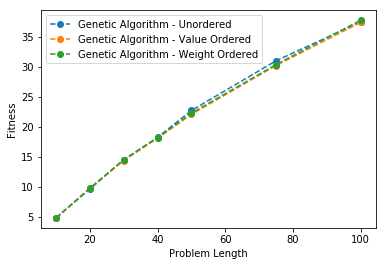

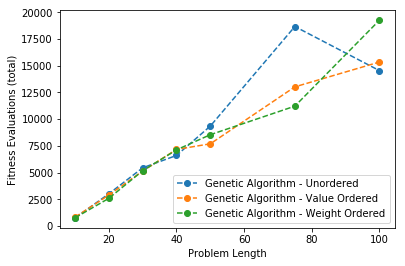

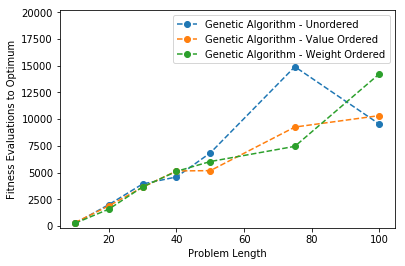

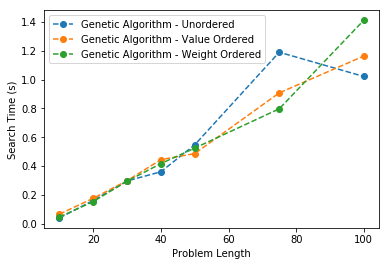

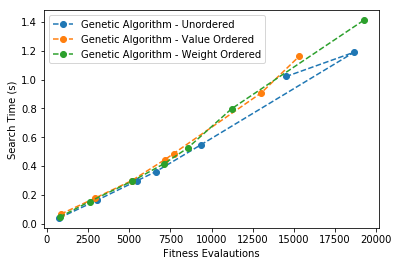

In [8]:
plot_results(results_df, savefig='knapsack_ga_ordered')